A number chain is created by continuously adding the square of the digits in a number to form a new number until it has been seen before.
For example,
\begin{align}
44 \to 32 \to 13 \to 10 \to \mathbf 1 \to \mathbf 1\\
85 \to \mathbf{89} \to 145 \to 42 \to 20 \to 4 \to 16 \to 37 \to 58 \to \mathbf{89}
\end{align}
Therefore any chain that arrives at $1$ or $89$ will become stuck in an endless loop. What is most amazing is that EVERY starting number will eventually arrive at $1$ or $89$.
How many starting numbers below ten million will arrive at $89$?


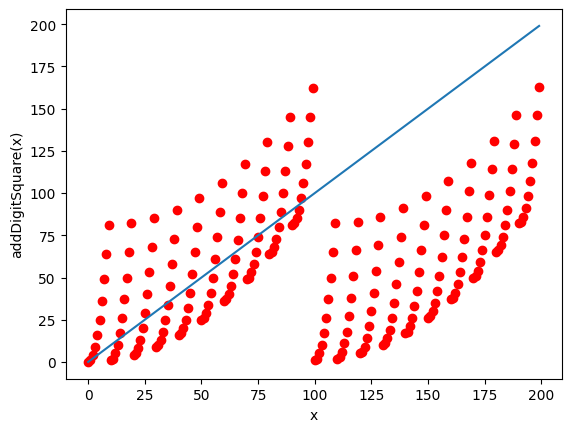

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def addDigitSquare(N):
    awnser =0
    
    for i in str(N) :
        awnser += int(i) * int(i)
    
    return awnser

# Generate some data
x = np.arange(0,200,1)
y = []
for i in x: y.append(addDigitSquare(i))

# Plot the data
plt.plot( y, 'ro',x)
plt.xlabel('x')
plt.ylabel('addDigitSquare(x)')

plt.show()


In [3]:
def findRoot(N):
    while N != 1 and N != 89:
        N = addDigitSquare(N)
        
        
    return N

findRoot(44)

1

### slow basic looping impliementation
###### 1m 18.2s
---

In [44]:
tenMill = 10000000


NumTo89 =0
for i in range(1,tenMill):
    rootI =  findRoot(i)
    if rootI == 89:
        NumTo89 += 1

print(NumTo89)

8581146


### set based, less repetition implementation
###### 23.3s
 we can imagine this as a tree
 -  the two roots of this tree are 1 and 89, 
 - at any number N, the child of N is addDigitSquare(N)
 - every N must only have one child, but could contain multiple parents
    - like a funnel, filtering into iether 89 or 1

from this we figure that,
if a letter K has a child of N it must follow the same path to the same root 

sets where used for that O(1) time, as the index grows 



---

In [ ]:
tenMill = 10000000

NumTo89 = {89}
NumTo1 = {1}

NumberTree = {}
for i in range(1,int(tenMill)):
    TestingNumber = i
    NumberTree = {i}
    while True:
        if TestingNumber in NumTo1:
            for k in NumberTree: NumTo1.add(k)
            break

        if TestingNumber in NumTo89:
            for k in NumberTree: NumTo89.add(k)
            break
        
        TestingNumber = addDigitSquare(TestingNumber)
    

print(len(NumTo89))

8581146
